In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from sklearn import model_selection
from keras.layers import Dense
from keras import regularizers


c:\Users\jahon\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('dados.csv', sep=',')
display(data)

,MADE,SHOT TYPE,PERIOD,TIME REMAINING,SHOT DISTANCE (FT),is_home,off_win_rate,def_blocks,def_win_rate,Age,Height,Weight,DRAFT NUMBER
0,1,2,1,675,13,1,0.621951,435,0.621951,29,195.072,100.000000,6
1,0,3,1,402,22,1,0.621951,435,0.621951,29,195.072,100.000000,6
2,0,2,1,205,6,1,0.621951,435,0.621951,29,195.072,100.000000,6
3,1,2,2,453,9,1,0.621951,435,0.621951,29,195.072,100.000000,6
4,0,2,2,393,6,1,0.621951,435,0.621951,29,195.072,100.000000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209621,1,2,1,189,13,0,0.439024,460,0.560976,29,201.168,90.909091,40
209622,0,3,2,614,24,0,0.439024,460,0.560976,29,201.168,90.909091,40
209623,0,2,2,225,7,0,0.439024,460,0.560976,29,201.168,90.909091,40
209624,0,2,4,640,8,0,0.439024,460,0.560976,29,201.168,90.909091,40


In [3]:
## versão com 10 mil linhas

data = data.sample(n=10000, random_state=23)

### Normalizando os dados

In [4]:
data_normalizado = data.copy()
for column in data_normalizado.columns:
    data_normalizado[column] = (data_normalizado[column] - data_normalizado[column].min()) / (data_normalizado[column].max() - data_normalizado[column].min())

display(data_normalizado)

,MADE,SHOT TYPE,PERIOD,TIME REMAINING,SHOT DISTANCE (FT),is_home,off_win_rate,def_blocks,def_win_rate,Age,Height,Weight,DRAFT NUMBER
183099,1.0,1.0,0.6,0.130618,0.352113,1.0,0.227273,0.436567,0.000000,0.541667,0.519651,0.285714,1.000000
173516,1.0,0.0,0.2,0.349719,0.014085,1.0,1.000000,1.000000,0.818182,0.541667,0.694323,0.452381,1.000000
204465,0.0,1.0,0.6,0.804775,0.352113,1.0,0.363636,0.436567,0.000000,0.500000,0.519651,0.206349,0.090909
121609,0.0,0.0,0.4,0.884831,0.000000,1.0,0.590909,0.597015,0.295455,0.500000,0.868996,0.746032,0.262626
11882,0.0,1.0,0.4,0.383427,0.366197,1.0,0.545455,0.350746,1.000000,0.083333,0.519651,0.365079,0.262626
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183370,0.0,1.0,0.2,0.646067,0.338028,1.0,0.727273,0.794776,0.704545,0.541667,0.650655,0.325397,0.242424
65370,1.0,1.0,0.4,0.514045,0.323944,0.0,0.113636,0.500000,0.386364,0.458333,0.563319,0.444444,0.050505
200576,1.0,0.0,0.0,0.834270,0.070423,0.0,0.818182,0.526119,0.340909,0.333333,0.650655,0.484127,0.444444
41630,1.0,0.0,0.0,0.553371,0.000000,0.0,0.590909,0.149254,0.636364,0.541667,0.432314,0.761905,0.151515


### Dividindo X e Y para o modelo

In [5]:
X = np.array(data_normalizado.drop(['MADE'], axis=1))
y = np.array(data_normalizado['MADE'])

### Dividindo os dados de treino e teste

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=23, test_size=0.2)

### Dividindo os dados de treino e validação

In [7]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, random_state=2, test_size=0.2)

### Criação e treino da rede neural com early stopping, weight decay e validação

In [8]:
model = Sequential()
model.add(Dense(70, input_dim=12, activation='relu'))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=16, callbacks=[es])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 70)                910       
                                                                 
 dense_1 (Dense)             (None, 1)                 71        
                                                                 
Total params: 981 (3.83 KB)
Trainable params: 981 (3.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Epoch 1/200
400/400 [==============================] - 2s 3ms/step - loss: 0.6864 - accuracy: 0.5780 - val_loss: 0.6825 - val_accuracy: 0.5850
Epoch 2/200
400/400 [==============================] - 1s 2ms/step - loss: 0.6767 - accuracy: 0.5844 - val_loss: 0.6816 - val_accuracy: 0.5931
Epoch 3/200
400/400 [==============================] - 1s 2ms/step - loss: 0.6741 - accuracy: 0.5917 - val_loss: 0.6781 - val_accuracy: 0.5906
Epoch 4/200
400/400 [==============================] - 1s 2ms/step - loss: 0.6728 - accuracy: 0.5936 - val_loss: 0.6767 - val_accuracy: 0.5931
Epoch 5/200
400/400 [==============================] - 1s 2ms/step - loss: 0.6712 - accuracy: 0.5950 - val_loss: 0.6760 - val_accuracy: 0.5900
Epoch 6/200
400/400 [==============================] - 1s 2ms/step - loss: 0.6705 - accuracy: 0.5895 - val_loss: 0.6755 - val_accuracy: 0.5875
Epoch 7/200
400/400 [==============================] - 1s 2ms/step - loss: 0.6700 - accuracy: 0.5970 - val_loss: 0.6752 - val_accuracy: 0

### Performance do modelo (treino x validação)

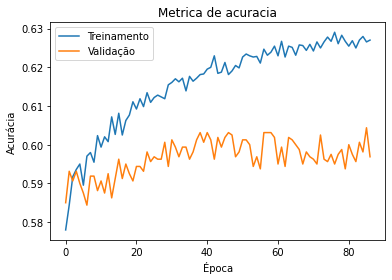

200/200 [==============================] - 0s 1ms/step

Acurácia (treino): 0.6281
Acurácia (validação): 0.5969


In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Metrica de acuracia')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'])
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

pred = np.round(model.predict(X_val))
pred_train = np.round(model.predict(X_train))

print(f'\nAcurácia (treino): {accuracy_score(y_train, pred_train):.4f}')
print(f'Acurácia (validação): {accuracy_score(y_val, pred):.4f}')

### Perfomance do modelo (treino x teste)

In [10]:
pred_test = np.round(model.predict(X_test))
pred_train = np.round(model.predict(X_train))

print()
print(f'Acuracia (treino): {accuracy_score(y_train, pred_train):.4f}')
print(f'Acuracia (teste): {accuracy_score(y_test, pred_test):.4f}')

print(f'\nEin: {1-accuracy_score(y_train, pred_train):.4f}') 
print(f'Ein: {1-accuracy_score(y_test, pred_test):.4f}')

print(classification_report(y_test, pred_test))

200/200 [==============================] - 0s 1ms/step

Acuracia (treino): 0.6281
Acuracia (teste): 0.6190

Ein: 0.3719
Ein: 0.3810
              precision    recall  f1-score   support

         0.0       0.60      0.78      0.68      1027
         1.0       0.66      0.44      0.53       973

    accuracy                           0.62      2000
   macro avg       0.63      0.61      0.61      2000
weighted avg       0.63      0.62      0.61      2000

